# Depth Complexity

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as mcolors
from random import shuffle
%matplotlib inline

In [38]:
COLORS = list(mcolors.TABLEAU_COLORS)
shuffle(COLORS)

In [39]:
ROOT = '/Users/jonathanlu/Documents/data_sym/DS'
STATE = 'GHZ'
NUM_DEPTHS = 6
L_SET = [3,4,5]
NRUN = 10
queries = np.zeros((len(L_SET), NUM_DEPTHS, NRUN))
for i, L in enumerate(L_SET):
    queries[i] = np.load(f'{ROOT}/{STATE}/L{L}/queries_{STATE}.npy')

In [40]:
avgs = np.mean(queries, axis=-1)
stdevs = np.std(queries, axis=-1)
x = np.arange(NUM_DEPTHS)

Text(0.5, 1.0, 'GHZ')

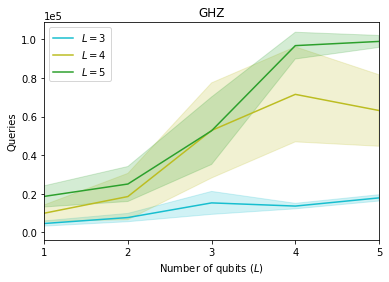

In [42]:
_, ax = plt.subplots()

for i, L in enumerate(L_SET):
    plt.plot(x, avgs[i], label=rf'$L = ${L}', c=COLORS[i])
    plt.fill_between(x, avgs[i] - stdevs[i], avgs[i] + stdevs[i], alpha=0.2, color=COLORS[i])

plt.xlabel(r"Number of qubits ($L$)")
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlim(left=1, right=L)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel("Queries")
plt.legend(loc='upper left')
plt.title(f"{STATE}")